# Van der Waals interaction and centrifugal barriers of $N=1$ molecules (space-fixed frame)

In [1]:
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import vdW_scripts as vdW

## N=0 molecule

### 1. Define parameters

In [2]:
JA = 0 # molecule A's rotational angular momentum
JB = 0 # molecule B's rotational angular momentum
Lmax = 5 # max partial wave to include

W = vdW.W_SF_coefficient_matrix(JA, JB, Lmax) # van der Waals coefficient C6 from second-order perturbation theory
C = vdW.centrifugal_coefficient_matrix(JA, JB, Lmax) # centrifugal energy 

### 2. Evaluate van der Waals coefficient C6

In [3]:
C6 = vdW.W_SF_coefficient(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
print("Van der Waals coefficient C6 = {:.2f} a.u..".format(C6))

Van der Waals coefficient C6 = -516403.87 a.u..


### 3. Calculate potential curve

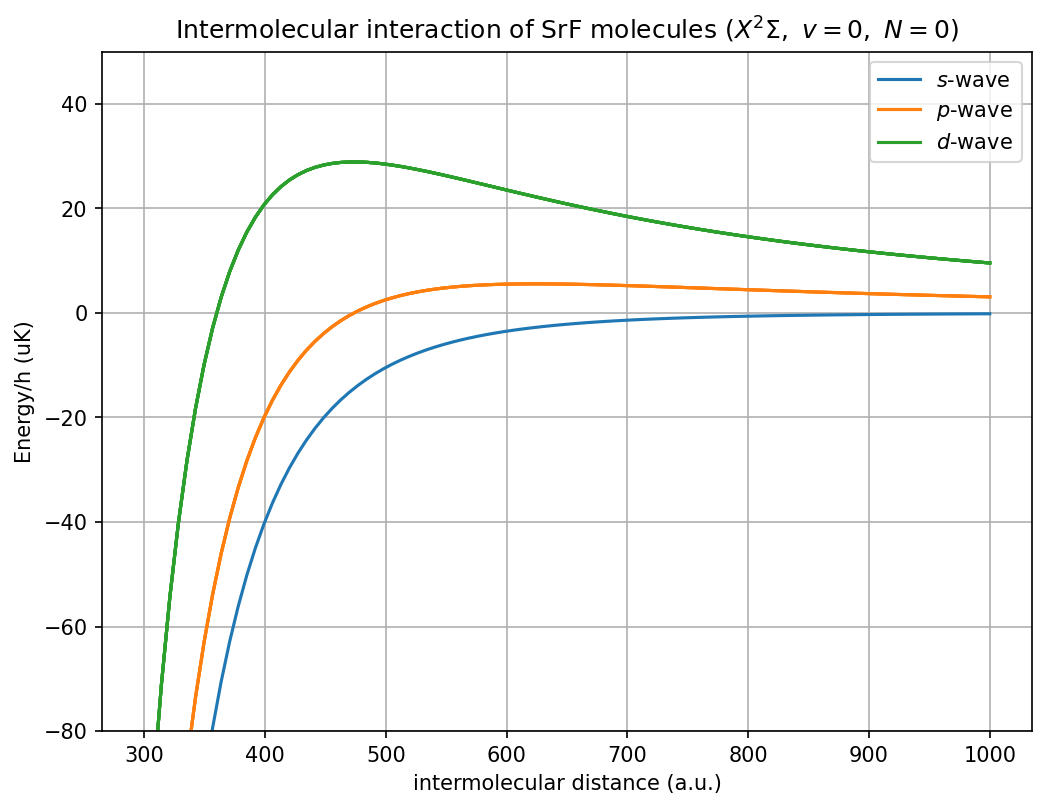

In [4]:
R_list = np.linspace(300, 1000, 100)
energies_list = np.empty((len(R_list), W.shape[0]), dtype=np.float64)
states_list = np.empty((len(R_list), W.shape[0], W.shape[0]), dtype=np.float64)
for i, R in enumerate(R_list):
    H = W*vdW.Hartree_to_uk/R**6 + C*vdW.Hartree_to_uk/R**2 # total energy
    energies, states = eigh(H)
    energies_list[i] = energies
    states_list[i] = states

energies_list, states_list = vdW.sort_eigenstates(energies_list, states_list)

fig = plt.figure(figsize=(8, 6), dpi=150)

ax1 = fig.add_subplot(1,1,1)
ax1.plot(R_list, energies_list[:, 0], color="C0", label="$s$-wave")
ax1.plot(R_list, energies_list[:, 1:4], color="C1", label="$p$-wave")
ax1.plot(R_list, energies_list[:, 4:9], color="C2", label="$d$-wave")

handles, labels = ax1.get_legend_handles_labels()
display = (0,1,4)

# plt.plot(R_list, energies_list[:, 0:9]) # plot s-, p-, d-wave potential curves

ax1.set_ylabel("Energy/h (uK)")
ax1.set_xlabel("intermolecular distance (a.u.)")
ax1.set_title("Intermolecular interaction of SrF molecules ($X^2\Sigma,\ v=0,\ N=0$)")
ax1.legend([handle for i,handle in enumerate(handles) if i in display],
            [label for i,label in enumerate(labels) if i in display], loc='upper right')

ax1.set_ylim(-80, 50)
ax1.grid()
plt.show()

### 4. Extract centrifugal barriers

In [5]:
p_wave_energies = energies_list[:, 1]
d_wave_energies = energies_list[:, 4]
f_wave_energies = energies_list[:, 9]
g_wave_energies = energies_list[:, 16]

p_wave_barrier = np.amax(p_wave_energies)
print("p-wave barrier height = {:.2f} uK.".format(p_wave_barrier))

d_wave_barrier = np.amax(d_wave_energies)
print("d-wave barrier height = {:.2f} uK.".format(d_wave_barrier))

f_wave_barrier = np.amax(f_wave_energies)
print("f-wave barrier height = {:.2f} uK.".format(f_wave_barrier))

g_wave_barrier = np.amax(g_wave_energies)
print("g-wave barrier height = {:.2f} uK.".format(g_wave_barrier))

p-wave barrier height = 5.56 uK.
d-wave barrier height = 28.89 uK.
f-wave barrier height = 81.73 uK.
g-wave barrier height = 175.85 uK.


### 5. Calculate unitarity collision rate

In [6]:
T = 40 # uK, molecule temperature

total_rate = vdW.unitarity_rate(T, 0) # s-wave loss rate
total_rate += vdW.unitarity_rate(T, p_wave_barrier) * 3 # p-wave loss rate
total_rate += vdW.unitarity_rate(T, d_wave_barrier) * 5 # d-wave loss rate

print("Unitarity loss rate (up to d-wave) = " + np.format_float_scientific(total_rate, 2) + " cm^3/s.")

total_rate += vdW.unitarity_rate(T, f_wave_barrier) * 7 # f-wave loss rate
total_rate += vdW.unitarity_rate(T, g_wave_barrier) * 9 # g-wave loss rate

print("Unitarity loss rate (up to g-wave) = " + np.format_float_scientific(total_rate, 2) + " cm^3/s.")

Unitarity loss rate (up to d-wave) = 1.08e-09 cm^3/s.
Unitarity loss rate (up to g-wave) = 1.27e-09 cm^3/s.
